In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats.mstats import gmean as geo
import pandas as pd
import SimFunctions
import SimRNG 
import SimClasses
import statsmodels.api as sm

In [2]:
# z
def CI_95(data): 
    a = 1.0*np.array(data)
    n = len(a)
    m,se = np.mean(a),stats.sem(a)
    h = 1.96*se
    return m-h, m+h, h

In [3]:
# t distribution
def CI_t(data,alpha): 
    a = 1.0*np.array(data)
    n = len(a)
    m,se = np.mean(a),stats.sem(a)
    h = stats.t.ppf(1-alpha/2,n-1)*se
    return m-h, m+h, h

## FCFS

In [60]:
ZSimRNG = SimRNG.InitializeRNSeed()

T1Queue = SimClasses.FIFOQueue()
T2Queue = SimClasses.FIFOQueue()
T3Queue = SimClasses.FIFOQueue()

IP1Queue = SimClasses.FIFOQueue()
IP2Queue = SimClasses.FIFOQueue()
IP3Queue = SimClasses.FIFOQueue()

T1Wait = SimClasses.DTStat()
T2Wait = SimClasses.DTStat()
T3Wait = SimClasses.DTStat()

IP1Wait = SimClasses.DTStat()
IP2Wait = SimClasses.DTStat()
IP3Wait = SimClasses.DTStat()

Server = SimClasses.Resource()
Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
TheResources = []

TheDTStats.append(T1Wait)
TheDTStats.append(T2Wait)
TheDTStats.append(T3Wait)

TheDTStats.append(IP1Wait)
TheDTStats.append(IP2Wait)
TheDTStats.append(IP3Wait)

TheQueues.append(T1Queue)
TheQueues.append(T2Queue)
TheQueues.append(T3Queue)

TheQueues.append(IP1Queue)
TheQueues.append(IP2Queue)
TheQueues.append(IP3Queue)

TheResources.append(Server)

Server.SetUnits (1) 


MeanAR = 14/60
T1MeanTBA = 1/(0.1*MeanAR)
T2MeanTBA = 1/(0.4*MeanAR)
T3MeanTBA = 1/(0.5*MeanAR)

MeanST = 1.3

RunLength = 60*24*380 # 380 days
WarmUp = 60*24*15 # first 15 days

AllT1WaitMean = []
AllT2WaitMean = []
AllT3WaitMean = []
AllIP1WaitMean = []
AllIP2WaitMean = []
AllIP3WaitMean = []

AllT1QueueMean = []
AllT2QueueMean = []
AllT3QueueMean = []
AllIP1QueueMean = []
AllIP2QueueMean = []
AllIP3QueueMean = []

AllT1QueueNum = []
AllT2QueueNum = []
AllT3QueueNum = []
AllIP1QueueNum = []
AllIP2QueueNum = []
AllIP3QueueNum = []

AllServerMean = []

# performance measures specified in the paper
T1Exceed = [] # keep track of the patients who are served after deadline 
T2Exceed = []
T3Exceed = [] 

IP1Cost = [] # record the IP cost
IP2Cost = []
IP3Cost = []

AllT1Exceed = []
AllT2Exceed = []
AllT3Exceed = []

AllIP1Cost = []
AllIP2Cost = []
AllIP3Cost = []

T1WaitingTimes = []
T2WaitingTimes = []
T3WaitingTimes = []

IP1QueueLength = []
IP2QueueLength = []
IP3QueueLength = []


def T1Arrival():
    SimFunctions.Schedule(Calendar,"T1Arrival",SimRNG.Expon(T1MeanTBA, 1))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T1"
    Customer.Deadline = SimClasses.Clock + 30   
    T1Queue.Add(Customer) 
    
    if Server.Busy == 0: 
        arrival_times = []
        for Q in TheQueues: 
            if Q.NumQueue() > 0: 
                temp_customer = Q.Remove()
                Q.Insert(temp_customer,0)
                arrival_times.append(temp_customer.CreateTime)
            else:
                arrival_times.append(float('inf'))

        if arrival_times.count(float('inf')) < len(arrival_times): 
            Server.Seize(1)
            fc_indx = np.argmin(arrival_times)
            NextCustomer = TheQueues[fc_indx].Remove()
            if NextCustomer.PatientClass == "T1": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T2": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T3": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"

            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)   
        


def T2Arrival():
    SimFunctions.Schedule(Calendar,"T2Arrival",SimRNG.Expon(T2MeanTBA, 1))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T2"
    Customer.Deadline = SimClasses.Clock + 60
    T2Queue.Add(Customer)
    
    if Server.Busy == 0: 
        arrival_times = []
        for Q in TheQueues: 
            if Q.NumQueue() > 0: 
                temp_customer = Q.Remove()
                Q.Insert(temp_customer,0)
                arrival_times.append(temp_customer.CreateTime)
            else:
                arrival_times.append(float('inf'))

        if arrival_times.count(float('inf')) < len(arrival_times): 
            Server.Seize(1)
            fc_indx = np.argmin(arrival_times)
            NextCustomer = TheQueues[fc_indx].Remove()
            if NextCustomer.PatientClass == "T1": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T2": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T3": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"

            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)



def T3Arrival():
    SimFunctions.Schedule(Calendar,"T3Arrival",SimRNG.Expon(T3MeanTBA, 1))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T3"
    Customer.Deadline = SimClasses.Clock + 120  
    T3Queue.Add(Customer)  
    
    if Server.Busy == 0: 
        arrival_times = []
        for Q in TheQueues: 
            if Q.NumQueue() > 0: 
                temp_customer = Q.Remove()
                Q.Insert(temp_customer,0)
                arrival_times.append(temp_customer.CreateTime)
            else:
                arrival_times.append(float('inf'))

        if arrival_times.count(float('inf')) < len(arrival_times): 
            Server.Seize(1)
            fc_indx = np.argmin(arrival_times)
            NextCustomer = TheQueues[fc_indx].Remove()
            if NextCustomer.PatientClass == "T1": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T2": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "T3": 
                event_name = "TriageEndOfService"
            elif NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"

            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
    

def TriageEndOfService(ThisCustomer): # both end of triage and start of IP1
    
    if ThisCustomer.PatientClass == "T1": 
        T1Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T1WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T1Exceed.append(1)
        else: T1Exceed.append(0)
    elif ThisCustomer.PatientClass == "T2": 
        T2Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T2WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T2Exceed.append(1)
        else: T2Exceed.append(0)
    elif ThisCustomer.PatientClass == "T3": 
        T3Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T3WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T3Exceed.append(1)
        else: T3Exceed.append(0)
    
    Customer = SimClasses.Entity()
    Customer.PatientClass = "IP1"
    
    
    u = SimRNG.Uniform(0,1.0, 3)
    
    if u <= (1-0.72): 
        Customer.IP1to2 = False
    else: 
        Customer.IP1to2 = True
        
    SimFunctions.Schedule(Calendar,"IP1Arrival",0)
    IP1Queue.Add(Customer)
    IP1QueueLength.append(IP1Queue.NumQueue())

    arrival_times = []
    for Q in TheQueues: 
        if Q.NumQueue() > 0: 

            temp_customer = Q.Remove()
            Q.Insert(temp_customer,0)
            arrival_times.append(temp_customer.CreateTime)
        else:
            arrival_times.append(float('inf'))

    if arrival_times.count(float('inf')) < len(arrival_times): 
        fc_indx = np.argmin(arrival_times)
        NextCustomer = TheQueues[fc_indx].Remove()
        if NextCustomer.PatientClass == "T1": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T2": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T3": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "IP1": 
            event_name = "IP1EndOfService"
        elif NextCustomer.PatientClass == "IP2": 
            event_name = "IP2EndOfService"
        elif NextCustomer.PatientClass == "IP3": 
            event_name = "IP3EndOfService"
        SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        Server.Free(1)

def IP1EndOfService(ThisCustomer):
    IP1Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
#    sojourn = SimClasses.Clock - ThisCustomer.CreateTime
    IP1Cost.append(1*IP1Queue.NumQueue()**2)
    
    if ThisCustomer.IP1to2: 
        Customer = SimClasses.Entity()
        Customer.PatientClass = "IP2"
        
        u = SimRNG.Uniform(0,1.0, 4)
    
        if u <= (1-0.58): 
            Customer.IP2to3 = False
        else: 
            Customer.IP2to3 = True   
        
        SimFunctions.Schedule(Calendar,"IP2Arrival",0)
        IP2Queue.Add(Customer)
        IP2QueueLength.append(IP2Queue.NumQueue())
        

    arrival_times = []
    for Q in TheQueues: 
        if Q.NumQueue() > 0: 
            temp_customer = Q.Remove()
            Q.Insert(temp_customer,0)
            arrival_times.append(temp_customer.CreateTime)
        else:
            arrival_times.append(float('inf'))

    if arrival_times.count(float('inf')) < len(arrival_times): 
        fc_indx = np.argmin(arrival_times)
        NextCustomer = TheQueues[fc_indx].Remove()
        if NextCustomer.PatientClass == "T1": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T2": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T3": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "IP1": 
            event_name = "IP1EndOfService"
        elif NextCustomer.PatientClass == "IP2": 
            event_name = "IP2EndOfService"
        elif NextCustomer.PatientClass == "IP3": 
            event_name = "IP3EndOfService"

        SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        Server.Free(1)
        
def IP2EndOfService(ThisCustomer): 
    IP2Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
    #sojourn = SimClasses.Clock - ThisCustomer.CreateTime
    IP2Cost.append(1.5*IP2Queue.NumQueue()**2)
    
    if ThisCustomer.IP2to3: 
        Customer = SimClasses.Entity()
        Customer.PatientClass = "IP3"
        
        SimFunctions.Schedule(Calendar,"IP3Arrival",0)
        IP3Queue.Add(Customer)
        IP3QueueLength.append(IP3Queue.NumQueue())

    arrival_times = []
    for Q in TheQueues: 
        if Q.NumQueue() > 0: 
            temp_customer = Q.Remove()
            Q.Insert(temp_customer,0)
            arrival_times.append(temp_customer.CreateTime)
        else:
            arrival_times.append(float('inf'))

    if arrival_times.count(float('inf')) < len(arrival_times): 
        fc_indx = np.argmin(arrival_times)
        NextCustomer = TheQueues[fc_indx].Remove()
        if NextCustomer.PatientClass == "T1": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T2": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T3": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "IP1": 
            event_name = "IP1EndOfService"
        elif NextCustomer.PatientClass == "IP2": 
            event_name = "IP2EndOfService"
        elif NextCustomer.PatientClass == "IP3": 
            event_name = "IP3EndOfService"

        SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        Server.Free(1)

def IP3EndOfService(ThisCustomer): 
    IP3Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
    #sojourn = SimClasses.Clock - ThisCustomer.CreateTime
    IP3Cost.append(2*IP3Queue.NumQueue()**2)
    
    arrival_times = []
    for Q in TheQueues: 
        if Q.NumQueue() > 0: 
            temp_customer = Q.Remove()
            Q.Insert(temp_customer,0)
            arrival_times.append(temp_customer.CreateTime)
        else:
            arrival_times.append(float('inf'))
    
    if arrival_times.count(float('inf')) < len(arrival_times): 
        fc_indx = np.argmin(arrival_times)
        NextCustomer = TheQueues[fc_indx].Remove()
        if NextCustomer.PatientClass == "T1": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T2": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "T3": 
            event_name = "TriageEndOfService"
        elif NextCustomer.PatientClass == "IP1": 
            event_name = "IP1EndOfService"
        elif NextCustomer.PatientClass == "IP2": 
            event_name = "IP2EndOfService"
        elif NextCustomer.PatientClass == "IP3": 
            event_name = "IP3EndOfService"
        
        SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        
    else: 
        Server.Free(1)  
        

In [61]:
for reps in range(0,160,1):
    print("at reps: ",reps,end="\r", flush=False)
    
    SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
    SimFunctions.Schedule(Calendar,"T1Arrival",SimRNG.Expon(T1MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"T2Arrival",SimRNG.Expon(T2MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"T3Arrival",SimRNG.Expon(T3MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"EndSimulation",RunLength)
    SimFunctions.Schedule(Calendar,"ClearIt",WarmUp)
    
    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime
    if NextEvent.EventType == "T1Arrival":
        T1Arrival()
    elif NextEvent.EventType == "T2Arrival":
        T2Arrival()
    elif NextEvent.EventType == "T3Arrival":
        T3Arrival()
    elif NextEvent.EventType == "TriageEndOfService":
        TriageEndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP1EndOfService": 
        IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
    elif NextEvent.EventType == "IP2EndOfService": 
        IP2EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP3EndOfService": 
        IP3EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "ClearIt":
        SimFunctions.ClearStats(TheCTStats,TheDTStats)
        # performance measures specified in the paper
        T1Exceed = [] # keep track of the patients who are served after deadline 
        T2Exceed = []
        T3Exceed = [] 

        IP1Cost = [] # record the IP cost
        IP2Cost = []
        IP3Cost = []
        
        T1WaitingTimes = []
        T2WaitingTimes = []
        T3WaitingTimes = []

        IP1QueueLength = []
        IP2QueueLength = []
        IP3QueueLength = []
        
    
    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "T1Arrival":
            T1Arrival()
        elif NextEvent.EventType == "T2Arrival":
            T2Arrival()
        elif NextEvent.EventType == "T3Arrival":
            T3Arrival()
        elif NextEvent.EventType == "TriageEndOfService":
            TriageEndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "IP1EndOfService": 
            IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
        elif NextEvent.EventType == "IP2EndOfService": 
            IP2EndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "IP3EndOfService": 
            IP3EndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "ClearIt":
            SimFunctions.ClearStats(TheCTStats,TheDTStats)
            T1Exceed = [] # keep track of the patients who are served after deadline 
            T2Exceed = []
            T3Exceed = [] 

            IP1Cost = [] # record the IP cost
            IP2Cost = []
            IP3Cost = []

            T1WaitingTimes = []
            T2WaitingTimes = []
            T3WaitingTimes = []

            IP1QueueLength = []
            IP2QueueLength = []
            IP3QueueLength = []
    
    AllT1WaitMean.append(T1Wait.Mean())
    AllT2WaitMean.append(T2Wait.Mean())
    AllT3WaitMean.append(T3Wait.Mean())
    AllIP1WaitMean.append(IP1Wait.Mean())
    AllIP2WaitMean.append(IP2Wait.Mean())
    AllIP3WaitMean.append(IP3Wait.Mean())
    
    AllT1QueueMean.append(T1Queue.Mean())
    AllT2QueueMean.append(T2Queue.Mean())
    AllT3QueueMean.append(T3Queue.Mean())
    AllIP1QueueMean.append(IP1Queue.Mean())
    AllIP2QueueMean.append(IP2Queue.Mean())
    AllIP3QueueMean.append(IP3Queue.Mean())
    
    AllT1QueueNum.append(T1Queue.NumQueue())
    AllT2QueueNum.append(T2Queue.NumQueue())
    AllT3QueueNum.append(T3Queue.NumQueue())
    AllIP1QueueNum.append(IP1Queue.NumQueue())
    AllIP2QueueNum.append(IP2Queue.NumQueue())
    AllIP3QueueNum.append(IP3Queue.NumQueue())

    AllServerMean.append(Server.Mean())
    
    AllT1Exceed.append(np.sum(T1Exceed)/len(T1Exceed))
    AllT2Exceed.append(np.sum(T2Exceed)/len(T2Exceed))
    AllT3Exceed.append(np.sum(T3Exceed)/len(T3Exceed))

    AllIP1Cost.append(np.mean(IP1Cost))
    AllIP2Cost.append(np.mean(IP2Cost))
    AllIP3Cost.append(np.mean(IP3Cost))


print("T1 estimated expected waiting time:",np.mean(AllT1WaitMean))
print("T2 estimated expected waiting time:",np.mean(AllT2WaitMean))
print("T3 estimated expected waiting time:",np.mean(AllT3WaitMean))
print("IP1 estimated expected waiting time:",np.mean(AllIP1WaitMean))
print("IP2 estimated expected waiting time:",np.mean(AllIP2WaitMean))
print("IP3 estimated expected waiting time:",np.mean(AllIP3WaitMean),"\n")

print("Estimated expected number of T1 customers in the queue:", np.mean(AllT1QueueMean))
print("Estimated expected number of T2 customers in the queue:", np.mean(AllT2QueueMean))
print("Estimated expected number of T3 customers in the queue:", np.mean(AllT3QueueMean))
print("Estimated expected number of IP1 customers in the queue:", np.mean(AllIP1QueueMean))
print("Estimated expected number of IP2 customers in the queue:", np.mean(AllIP2QueueMean))
print("Estimated expected number of IP3 customers in the queue:", np.mean(AllIP3QueueMean))


print("Estimated expected utilization of the super physian:",np.mean(AllServerMean),"\n")

t1l, t1u, t1hw = CI_t(AllT1Exceed,0.05)
print("T1 estimated expected proportion of patients exceeding deadline:",np.mean(AllT1Exceed))
print("T1 95% CI:",t1l, t1u,"\n")

t2l, t2u, t2hw = CI_t(AllT2Exceed,0.05)
print("T2 estimated expected proportion of patients exceeding deadline:",np.mean(AllT2Exceed))
print("T2 95% CI:",t2l, t2u,"\n")

t3l, t3u, t3hw = CI_t(AllT3Exceed,0.05)
print("T3 estimated expected proportion of patients exceeding deadline:",np.mean(AllT3Exceed),"\n")
print("T3 95% CI:",t3l, t3u,"\n")

ip1l, ip1u, ip1hw = CI_t(AllIP1Cost,0.05)
print("IP1 estimated expected cost:",np.mean(AllIP1Cost))
print("IP1 95% CI:",ip1l, ip1u,"\n")

ip2l, ip2u, ip2hw = CI_t(AllIP2Cost,0.05)
print("IP2 estimated expected cost:",np.mean(AllIP2Cost))
print("IP2 95% CI:",ip2l, ip2u,"\n")

ip3l, ip3u, ip3hw = CI_t(AllIP3Cost,0.05)
print("IP3 estimated expected cost:",np.mean(AllIP3Cost))
print("IP3 95% CI:",ip3l, ip3u,"\n")

T1 estimated expected waiting time: 26.9932398698193
T2 estimated expected waiting time: 27.006908420075554
T3 estimated expected waiting time: 27.021210164962053
IP1 estimated expected waiting time: 27.01245145927618
IP2 estimated expected waiting time: 27.013894928268297
IP3 estimated expected waiting time: 27.000447026746304 

Estimated expected number of T1 customers in the queue: 0.6001607612547586
Estimated expected number of T2 customers in the queue: 2.4002893075245977
Estimated expected number of T3 customers in the queue: 3.001526938294941
Estimated expected number of IP1 customers in the queue: 6.0019938128425
Estimated expected number of IP2 customers in the queue: 4.321116676531275
Estimated expected number of IP3 customers in the queue: 2.5048947598476143
Estimated expected utilization of the super physian: 0.9517037041686031 

T1 estimated expected proportion of patients exceeding deadline: 0.32890305682322013
T1 95% CI: 0.32390359832619176 0.3339025153202485 

T2 estima

## Plots for result analysis, FCFS policy 

Text(0.5, 1.0, 'Triage-1 Patient Waiting Times Under FCFS Policy')

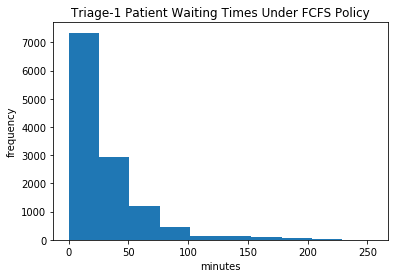

In [67]:
plt.hist(T1WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-1 Patient Waiting Times Under FCFS Policy")

Text(0.5, 1.0, 'Triage-2 Patient Waiting Times Under FCFS Policy')

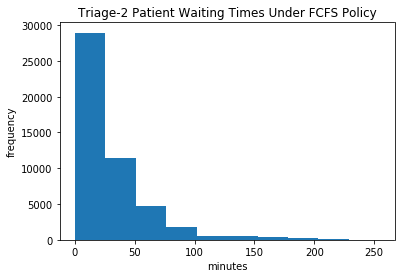

In [68]:
plt.hist(T2WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-2 Patient Waiting Times Under FCFS Policy")

Text(0.5, 1.0, 'Triage-3 Patient Waiting Times Under FCFS Policy')

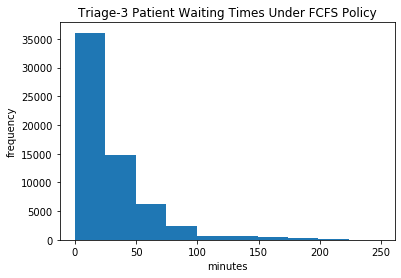

In [69]:
plt.hist(T3WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-3 Patient Waiting Times Under FCFS Policy")

Text(0.5, 1.0, 'IP-1 Queue Length Under FCFS Policy')

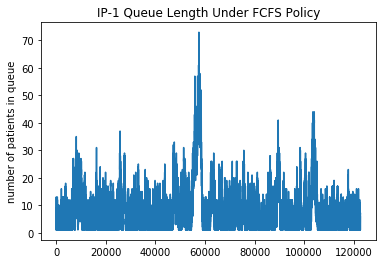

In [72]:
plt.plot(IP1QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-1 Queue Length Under FCFS Policy")

Text(0.5, 1.0, 'IP-2 Queue Length Under FCFS Policy')

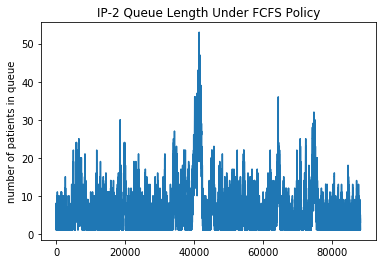

In [73]:
plt.plot(IP2QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-2 Queue Length Under FCFS Policy")

Text(0.5, 1.0, 'IP-3 Queue Length Under FCFS Policy')

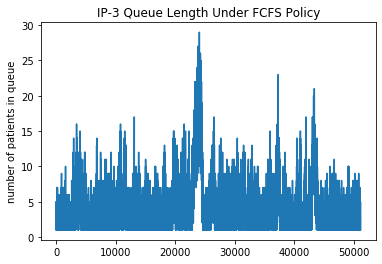

In [74]:
plt.plot(IP3QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-3 Queue Length Under FCFS Policy")

## Threshold control policy

In [78]:
ZSimRNG = SimRNG.InitializeRNSeed()

T1Queue = SimClasses.FIFOQueue()
T2Queue = SimClasses.FIFOQueue()
T3Queue = SimClasses.FIFOQueue()

IP1Queue = SimClasses.FIFOQueue()
IP2Queue = SimClasses.FIFOQueue()
IP3Queue = SimClasses.FIFOQueue()

T1Wait = SimClasses.DTStat()
T2Wait = SimClasses.DTStat()
T3Wait = SimClasses.DTStat()

IP1Wait = SimClasses.DTStat()
IP2Wait = SimClasses.DTStat()
IP3Wait = SimClasses.DTStat()

Server = SimClasses.Resource()
Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
TheResources = []

TheDTStats.append(T1Wait)
TheDTStats.append(T2Wait)
TheDTStats.append(T3Wait)

TheDTStats.append(IP1Wait)
TheDTStats.append(IP2Wait)
TheDTStats.append(IP3Wait)

TheQueues.append(T1Queue)
TheQueues.append(T2Queue)
TheQueues.append(T3Queue)

TheQueues.append(IP1Queue)
TheQueues.append(IP2Queue)
TheQueues.append(IP3Queue)

TheResources.append(Server)

Server.SetUnits (1) 


MeanAR = 14/60
T1MeanTBA = 1/(0.1*MeanAR)
T2MeanTBA = 1/(0.4*MeanAR)
T3MeanTBA = 1/(0.5*MeanAR)

MeanST = 1.3

epsilon = 5 # threshold for triage patients
IP_costs = [1,1.5,2]

RunLength = 60*24*415 # 415 days
WarmUp = 60*24*50 # first 50 days

AllT1WaitMean = []
AllT2WaitMean = []
AllT3WaitMean = []
AllIP1WaitMean = []
AllIP2WaitMean = []
AllIP3WaitMean = []

AllT1QueueMean = []
AllT2QueueMean = []
AllT3QueueMean = []
AllIP1QueueMean = []
AllIP2QueueMean = []
AllIP3QueueMean = []

AllT1QueueNum = []
AllT2QueueNum = []
AllT3QueueNum = []
AllIP1QueueNum = []
AllIP2QueueNum = []
AllIP3QueueNum = []

AllServerMean = []

# performance measures specified in the paper
T1Exceed = [] # keep track of the patients who are served after deadline 
T2Exceed = []
T3Exceed = [] 

IP1Cost = [] # record the IP cost
IP2Cost = []
IP3Cost = []

AllT1Exceed = []
AllT2Exceed = []
AllT3Exceed = []

AllIP1Cost = []
AllIP2Cost = []
AllIP3Cost = []


T1WaitingTimes = []
T2WaitingTimes = []
T3WaitingTimes = []

IP1QueueLength = []
IP2QueueLength = []
IP3QueueLength = []

###### to determine the warm-up period 
t1arrival = []
t2arrival = []
t3arrival = []


def T1Arrival():
    SimFunctions.Schedule(Calendar,"T1Arrival",SimRNG.Expon(T1MeanTBA, 1))
    t1arrival.append(SimClasses.Clock/(24*60))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T1"
    Customer.DTimeUnits = 30
    Customer.Deadline = SimClasses.Clock + 30   
    T1Queue.Add(Customer) 
    
    if Server.Busy == 0:
        t_age = []
        for q in range(3): # check if any triage patient would exceed the deadline 
            if TheQueues[q].NumQueue() > 0:
                temp_customer = TheQueues[q].Remove()
                TheQueues[q].Insert(temp_customer,0)
                if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
                else: t_age.append(float('inf'))
            else: t_age.append(float('inf'))
                
        if t_age.count(float('inf')) < len(t_age): 
            Server.Seize(1)
            indx = np.argmin(t_age)
            NextCustomer = TheQueues[indx].Remove()
            SimFunctions.SchedulePlus(Calendar,"TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)
                
        else:
            costs = []
            for q in range(3,6): # find the IP patient with largest cost
                
                if TheQueues[q].NumQueue() > 0: 
                    costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
                else: costs.append(0)
            
            if costs.count(0) < len(costs):
                Server.Seize(1)
                indx = np.argmax(costs)
                NextCustomer = TheQueues[3+indx].Remove()
                if NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"
                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
            else: 
                arrival_times = []
                for Q in TheQueues: 
                    if Q.NumQueue() > 0: 
                        temp_customer = Q.Remove()
                        Q.Insert(temp_customer,0)
                        arrival_times.append(temp_customer.CreateTime)
                    else:
                        arrival_times.append(float('inf'))

                if arrival_times.count(float('inf')) < len(arrival_times): 
                    Server.Seize(1)
                    fc_indx = np.argmin(arrival_times)
                    NextCustomer = TheQueues[fc_indx].Remove()
                    if NextCustomer.PatientClass == "T1": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T2": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T3": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "IP1": 
                        event_name = "IP1EndOfService"
                    elif NextCustomer.PatientClass == "IP2": 
                        event_name = "IP2EndOfService"
                    elif NextCustomer.PatientClass == "IP3": 
                        event_name = "IP3EndOfService"

                    SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
                
def T2Arrival():
    SimFunctions.Schedule(Calendar,"T2Arrival",SimRNG.Expon(T2MeanTBA, 1))
    t2arrival.append(SimClasses.Clock/(24*60))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T2"
    Customer.DTimeUnits = 60
    Customer.Deadline = SimClasses.Clock + 60
    T2Queue.Add(Customer)
    
    if Server.Busy == 0:
        t_age = []
        for q in range(3): # check if any triage patient would exceed the deadline 
            if TheQueues[q].NumQueue() > 0:
                temp_customer = TheQueues[q].Remove()
                TheQueues[q].Insert(temp_customer,0)
                if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
                else: t_age.append(float('inf'))
            else: t_age.append(float('inf'))
                
        if t_age.count(float('inf')) < len(t_age): 
            Server.Seize(1)
            indx = np.argmin(t_age)
            NextCustomer = TheQueues[indx].Remove()
            SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)
                
        else: 
            costs = []
            for q in range(3,6): # find the IP patient with largest cost
                if TheQueues[q].NumQueue() > 0: 
                    costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
                else: costs.append(0)
            
            if costs.count(0) < len(costs):
                Server.Seize(1)
                indx = np.argmax(costs)
                NextCustomer = TheQueues[3+indx].Remove()
                if NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"
                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
            else: 
                arrival_times = []
                for Q in TheQueues: 
                    if Q.NumQueue() > 0: 
                        temp_customer = Q.Remove()
                        Q.Insert(temp_customer,0)
                        arrival_times.append(temp_customer.CreateTime)
                    else:
                        arrival_times.append(float('inf'))

                if arrival_times.count(float('inf')) < len(arrival_times): 
                    Server.Seize(1)
                    fc_indx = np.argmin(arrival_times)
                    NextCustomer = TheQueues[fc_indx].Remove()
                    if NextCustomer.PatientClass == "T1": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T2": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T3": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "IP1": 
                        event_name = "IP1EndOfService"
                    elif NextCustomer.PatientClass == "IP2": 
                        event_name = "IP2EndOfService"
                    elif NextCustomer.PatientClass == "IP3": 
                        event_name = "IP3EndOfService"

                    SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)


def T3Arrival():
    SimFunctions.Schedule(Calendar,"T3Arrival",SimRNG.Expon(T3MeanTBA, 1))
    t3arrival.append(SimClasses.Clock/(24*60))
    Customer = SimClasses.Entity()
    Customer.PatientClass = "T3"
    Customer.DTimeUnits = 120
    Customer.Deadline = SimClasses.Clock + 120  
    T3Queue.Add(Customer)  
    
    if Server.Busy == 0:
        t_age = []
        for q in range(3): # check if any triage patient would exceed the deadline 
            if TheQueues[q].NumQueue() > 0:
                temp_customer = TheQueues[q].Remove()
                TheQueues[q].Insert(temp_customer,0)
                if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
                else: t_age.append(float('inf'))
            else: t_age.append(float('inf'))
                
        if t_age.count(float('inf')) < len(t_age): 
            Server.Seize(1)
            indx = np.argmin(t_age)
            NextCustomer = TheQueues[indx].Remove()                   
            SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)
                
        else: 
            costs = []
            for q in range(3,6): # find the IP patient with largest cost
                if TheQueues[q].NumQueue() > 0: 
                    costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
                else: costs.append(0)
            
            if costs.count(0) < len(costs):
                Server.Seize(1)
                indx = np.argmax(costs)
                NextCustomer = TheQueues[3+indx].Remove()
                if NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"
                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
            else: 
                arrival_times = []
                for Q in TheQueues: 
                    if Q.NumQueue() > 0: 
                        temp_customer = Q.Remove()
                        Q.Insert(temp_customer,0)
                        arrival_times.append(temp_customer.CreateTime)
                    else:
                        arrival_times.append(float('inf'))

                if arrival_times.count(float('inf')) < len(arrival_times): 
                    Server.Seize(1)
                    fc_indx = np.argmin(arrival_times)
                    NextCustomer = TheQueues[fc_indx].Remove()
                    if NextCustomer.PatientClass == "T1": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T2": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "T3": 
                        event_name = "TriageEndOfService"
                    elif NextCustomer.PatientClass == "IP1": 
                        event_name = "IP1EndOfService"
                    elif NextCustomer.PatientClass == "IP2": 
                        event_name = "IP2EndOfService"
                    elif NextCustomer.PatientClass == "IP3": 
                        event_name = "IP3EndOfService"

                    SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        

def TriageEndOfService(ThisCustomer): # both end of triage and start of IP1
    
    if ThisCustomer.PatientClass == "T1": 
        T1Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T1WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T1Exceed.append(1)
        else: T1Exceed.append(0)
    elif ThisCustomer.PatientClass == "T2": 
        T2Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T2WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T2Exceed.append(1)
        else: T2Exceed.append(0)
    elif ThisCustomer.PatientClass == "T3": 
        T3Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
        T3WaitingTimes.append(SimClasses.Clock - ThisCustomer.CreateTime)
        if SimClasses.Clock > ThisCustomer.Deadline: 
            T3Exceed.append(1)
        else: T3Exceed.append(0)
    
    Customer = SimClasses.Entity()
    Customer.PatientClass = "IP1"
    
    u = SimRNG.Uniform(0,1.0, 3)
    
    if u <= (1-0.72): 
        Customer.IP1to2 = False
    else: 
        Customer.IP1to2 = True
        
    SimFunctions.Schedule(Calendar,"IP1Arrival",0)
    IP1Queue.Add(Customer)
    IP1QueueLength.append(IP1Queue.NumQueue())
    
       
    t_age = []
    for q in range(3): # check if any triage patient would exceed the deadline 
        if TheQueues[q].NumQueue() > 0:
            temp_customer = TheQueues[q].Remove()
            TheQueues[q].Insert(temp_customer,0)
            if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
            else: t_age.append(float('inf'))
        else: t_age.append(float('inf'))
                
    if t_age.count(float('inf')) < len(t_age): 
        Server.Seize(1)
        indx = np.argmin(t_age)
        NextCustomer = TheQueues[indx].Remove()
        SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        costs = []
        for q in range(3,6): # find the IP patient with largest cost
            if TheQueues[q].NumQueue() > 0: 
                costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
            else: costs.append(0)

        if costs.count(0) < len(costs):
            Server.Seize(1)
            indx = np.argmax(costs)
            NextCustomer = TheQueues[3+indx].Remove()
            if NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"
            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        else: 
            arrival_times = []
            for Q in TheQueues: 
                if Q.NumQueue() > 0: 
                    temp_customer = Q.Remove()
                    Q.Insert(temp_customer,0)
                    arrival_times.append(temp_customer.CreateTime)
                else:
                    arrival_times.append(float('inf'))

            if arrival_times.count(float('inf')) < len(arrival_times): 
                Server.Seize(1)
                fc_indx = np.argmin(arrival_times)
                NextCustomer = TheQueues[fc_indx].Remove()
                if NextCustomer.PatientClass == "T1": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T2": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T3": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"

                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

            else: 
                Server.Free(1)
            #print("end of a triage patient service, the server is set free")


def IP1EndOfService(ThisCustomer): # both end of IP1 and start of IP2 if patient needs to enter IP2
    IP1Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
    IP1Cost.append(1*IP1Queue.NumQueue()**2)
    
    if ThisCustomer.IP1to2: 
        Customer = SimClasses.Entity()
        Customer.PatientClass = "IP2"
        
        u = SimRNG.Uniform(0,1.0, 4)
    
        if u <= (1-0.58): 
            Customer.IP2to3 = False
        else: 
            Customer.IP2to3 = True   
        
        SimFunctions.Schedule(Calendar,"IP2Arrival",0)
        IP2Queue.Add(Customer)
        IP2QueueLength.append(IP2Queue.NumQueue())
        

    t_age = []
    for q in range(3): # check if any triage patient would exceed the deadline 
        if TheQueues[q].NumQueue() > 0:
            temp_customer = TheQueues[q].Remove()
            TheQueues[q].Insert(temp_customer,0)
            if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
            else: t_age.append(float('inf'))
        else: t_age.append(float('inf'))
                
    if t_age.count(float('inf')) < len(t_age): 
        Server.Seize(1)
        indx = np.argmin(t_age)
        NextCustomer = TheQueues[indx].Remove()
        SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        costs = []
        for q in range(3,6): # find the IP patient with largest cost
            if TheQueues[q].NumQueue() > 0: 
                costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
            else: costs.append(0)

        if costs.count(0) < len(costs):
            Server.Seize(1)
            indx = np.argmax(costs)
            NextCustomer = TheQueues[3+indx].Remove()
            if NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"
            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        
        else: 
            arrival_times = []
            for Q in TheQueues: 
                if Q.NumQueue() > 0: 
                    temp_customer = Q.Remove()
                    Q.Insert(temp_customer,0)
                    arrival_times.append(temp_customer.CreateTime)
                else:
                    arrival_times.append(float('inf'))

            if arrival_times.count(float('inf')) < len(arrival_times): 
                Server.Seize(1)
                fc_indx = np.argmin(arrival_times)
                NextCustomer = TheQueues[fc_indx].Remove()
                if NextCustomer.PatientClass == "T1": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T2": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T3": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"

                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

            else: 
                Server.Free(1)
            #print("end of a IP1 patient service, the server is set free")
            
        
def IP2EndOfService(ThisCustomer): 
    IP2Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
    IP2Cost.append(1.5*IP2Queue.NumQueue()**2)
    
    if ThisCustomer.IP2to3: 
        Customer = SimClasses.Entity()
        Customer.PatientClass = "IP3"
        
        SimFunctions.Schedule(Calendar,"IP3Arrival",0)
        IP3Queue.Add(Customer)
        IP3QueueLength.append(IP3Queue.NumQueue())

    t_age = []
    for q in range(3): # check if any triage patient would exceed the deadline 
        if TheQueues[q].NumQueue() > 0:
            temp_customer = TheQueues[q].Remove()
            TheQueues[q].Insert(temp_customer,0)
            if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
            else: t_age.append(float('inf'))
        else: t_age.append(float('inf'))
                
    if t_age.count(float('inf')) < len(t_age): 
        Server.Seize(1)
        indx = np.argmin(t_age)
        NextCustomer = TheQueues[indx].Remove()
        SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        costs = []
        for q in range(3,6): # find the IP patient with largest cost
            if TheQueues[q].NumQueue() > 0: 
                costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
            else: costs.append(0)

        if costs.count(0) < len(costs):
            Server.Seize(1)
            indx = np.argmax(costs)
            NextCustomer = TheQueues[3+indx].Remove()
            if NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"
            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        
        else: 
            arrival_times = []
            for Q in TheQueues: 
                if Q.NumQueue() > 0: 
                    temp_customer = Q.Remove()
                    Q.Insert(temp_customer,0)
                    arrival_times.append(temp_customer.CreateTime)
                else:
                    arrival_times.append(float('inf'))

            if arrival_times.count(float('inf')) < len(arrival_times): 
                Server.Seize(1)
                fc_indx = np.argmin(arrival_times)
                NextCustomer = TheQueues[fc_indx].Remove()
                if NextCustomer.PatientClass == "T1": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T2": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T3": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"

                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

            else: 
                Server.Free(1)
            #print("end of a IP2 patient service, the server is set free")
            

def IP3EndOfService(ThisCustomer): 
    IP3Wait.Record(SimClasses.Clock - ThisCustomer.CreateTime)
    IP3Cost.append(2*IP3Queue.NumQueue()**2)
    
    t_age = []
    for q in range(3): # check if any triage patient would exceed the deadline 
        if TheQueues[q].NumQueue() > 0:
            temp_customer = TheQueues[q].Remove()
            TheQueues[q].Insert(temp_customer,0)
            if SimClasses.Clock - temp_customer.CreateTime >= temp_customer.DTimeUnits - epsilon:
                    t_age.append(temp_customer.DTimeUnits - (SimClasses.Clock - temp_customer.CreateTime))
            else: t_age.append(float('inf'))
        else: t_age.append(float('inf'))
            
    if t_age.count(float('inf')) < len(t_age): 
        Server.Seize(1)
        indx = np.argmin(t_age)
        NextCustomer = TheQueues[indx].Remove()
        SimFunctions.SchedulePlus(Calendar, "TriageEndOfService",SimRNG.Expon(MeanST,2),NextCustomer)

    else: 
        costs = []
        for q in range(3,6): # find the IP patient with largest cost
            if TheQueues[q].NumQueue() > 0: 
                costs.append(IP_costs[q-3]*2*TheQueues[q].NumQueue())
            else: costs.append(0)

        if costs.count(0) < len(costs):
            Server.Seize(1)
            indx = np.argmax(costs)
            NextCustomer = TheQueues[3+indx].Remove()
            if NextCustomer.PatientClass == "IP1": 
                event_name = "IP1EndOfService"
            elif NextCustomer.PatientClass == "IP2": 
                event_name = "IP2EndOfService"
            elif NextCustomer.PatientClass == "IP3": 
                event_name = "IP3EndOfService"
            SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)
        
        else: 
            arrival_times = []
            for Q in TheQueues: 
                if Q.NumQueue() > 0: 
                    temp_customer = Q.Remove()
                    Q.Insert(temp_customer,0)
                    arrival_times.append(temp_customer.CreateTime)
                else:
                    arrival_times.append(float('inf'))

            if arrival_times.count(float('inf')) < len(arrival_times): 
                Server.Seize(1)
                fc_indx = np.argmin(arrival_times)
                NextCustomer = TheQueues[fc_indx].Remove()
                if NextCustomer.PatientClass == "T1": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T2": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "T3": 
                    event_name = "TriageEndOfService"
                elif NextCustomer.PatientClass == "IP1": 
                    event_name = "IP1EndOfService"
                elif NextCustomer.PatientClass == "IP2": 
                    event_name = "IP2EndOfService"
                elif NextCustomer.PatientClass == "IP3": 
                    event_name = "IP3EndOfService"

                SimFunctions.SchedulePlus(Calendar, event_name,SimRNG.Expon(MeanST,2),NextCustomer)

            else: 
                Server.Free(1) 
            #print("end of a IP3 patient service, the server is set free")
        

## To determine the warm-up period 

In [16]:
# performance measures specified in the paper
T1Exceed = [] # keep track of the patients who are served after deadline 
T2Exceed = []
T3Exceed = [] 

IP1Cost = [] # record the IP cost
IP2Cost = []
IP3Cost = []

SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
SimFunctions.Schedule(Calendar,"T1Arrival",SimRNG.Expon(T1MeanTBA, 1))
SimFunctions.Schedule(Calendar,"T2Arrival",SimRNG.Expon(T2MeanTBA, 1))
SimFunctions.Schedule(Calendar,"T3Arrival",SimRNG.Expon(T3MeanTBA, 1))
SimFunctions.Schedule(Calendar,"EndSimulation",RunLength)
SimFunctions.Schedule(Calendar,"ClearIt",WarmUp)

NextEvent = Calendar.Remove()
SimClasses.Clock = NextEvent.EventTime
if NextEvent.EventType == "T1Arrival":
    T1Arrival()
elif NextEvent.EventType == "T2Arrival":
    T2Arrival()
elif NextEvent.EventType == "T3Arrival":
    T3Arrival()
elif NextEvent.EventType == "TriageEndOfService":
    TriageEndOfService(NextEvent.WhichObject)
elif NextEvent.EventType == "IP1EndOfService": 
    IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
elif NextEvent.EventType == "IP2EndOfService": 
    IP2EndOfService(NextEvent.WhichObject)
elif NextEvent.EventType == "IP3EndOfService": 
    IP3EndOfService(NextEvent.WhichObject)
elif NextEvent.EventType == "ClearIt":
    SimFunctions.ClearStats(TheCTStats,TheDTStats)
    
while NextEvent.EventType != "EndSimulation":
    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime
    if NextEvent.EventType == "T1Arrival":
        T1Arrival()
    elif NextEvent.EventType == "T2Arrival":
        T2Arrival()
    elif NextEvent.EventType == "T3Arrival":
        T3Arrival()
    elif NextEvent.EventType == "TriageEndOfService":
        TriageEndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP1EndOfService": 
        IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
    elif NextEvent.EventType == "IP2EndOfService": 
        IP2EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP3EndOfService": 
        IP3EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "ClearIt":
        SimFunctions.ClearStats(TheCTStats,TheDTStats)
        


Text(0.5, 1.0, 'Proportion of Triage-1 Violating Deadline - Cumulative Average')

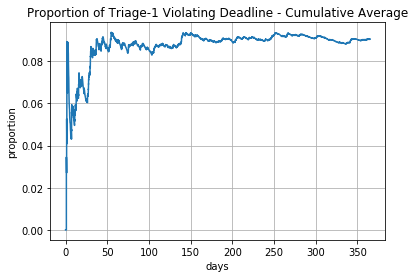

In [25]:
# determine the warmup using the conservative approach 
t1_cum_avg = []
t2_cum_avg = []
t3_cum_avg = []

t1cum = 0
t2cum = 0 
t3cum = 0


for i in range(len(T1Exceed)): 
    t1cum += T1Exceed[i] # cumulative waiting time
    t1_cum_avg.append(t1cum/(i+1)) # cumulative average of the waiting time

plt.plot(t1arrival,t1_cum_avg)
plt.grid(b=None, which='major', axis='both')
plt.xlabel("days")
plt.ylabel("proportion")
plt.title("Proportion of Triage-1 Violating Deadline - Cumulative Average")

In [79]:
hw_t1wait = [] # halfwidth list
hw_t2wait = []
hw_t3wait = []
hw_ip1wait = []
hw_ip2wait = []
hw_ip3wait = []

hw_t1queue = []
hw_t2queue = []
hw_t3queue = []
hw_ip1queue = []
hw_ip2queue = []
hw_ip3queue = []

hw_t1exc = []
hw_t2exc = []
hw_t3exc = []
hw_ip1cost = []
hw_ip2cost = []
hw_ip3cost = []
    
AllT1WaitMean = []
AllT2WaitMean = []
AllT3WaitMean = []
AllIP1WaitMean = []
AllIP2WaitMean = []
AllIP3WaitMean = []

AllT1QueueMean = []
AllT2QueueMean = []
AllT3QueueMean = []
AllIP1QueueMean = []
AllIP2QueueMean = []
AllIP3QueueMean = []

AllT1QueueNum = []
AllT2QueueNum = []
AllT3QueueNum = []
AllIP1QueueNum = []
AllIP2QueueNum = []
AllIP3QueueNum = []

AllServerMean = []

for reps in range(0,160,1):
    print("at reps: ",reps,end="\r", flush=False)

    SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
    SimFunctions.Schedule(Calendar,"T1Arrival",SimRNG.Expon(T1MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"T2Arrival",SimRNG.Expon(T2MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"T3Arrival",SimRNG.Expon(T3MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"EndSimulation",RunLength)
    SimFunctions.Schedule(Calendar,"ClearIt",WarmUp)

    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime
    if NextEvent.EventType == "T1Arrival":
        T1Arrival()
    elif NextEvent.EventType == "T2Arrival":
        T2Arrival()
    elif NextEvent.EventType == "T3Arrival":
        T3Arrival()
    elif NextEvent.EventType == "TriageEndOfService":
        TriageEndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP1EndOfService": 
        IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
    elif NextEvent.EventType == "IP2EndOfService": 
        IP2EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "IP3EndOfService": 
        IP3EndOfService(NextEvent.WhichObject)
    elif NextEvent.EventType == "ClearIt":
        SimFunctions.ClearStats(TheCTStats,TheDTStats)
        # performance measures specified in the paper
        T1Exceed = [] # keep track of the patients who are served after deadline 
        T2Exceed = []
        T3Exceed = [] 

        IP1Cost = [] # record the IP cost
        IP2Cost = []
        IP3Cost = []
        
        T1WaitingTimes = []
        T2WaitingTimes = []
        T3WaitingTimes = []
        
        IP1QueueLength = []
        IP2QueueLength = []
        IP3QueueLength = []

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "T1Arrival":
            T1Arrival()
        elif NextEvent.EventType == "T2Arrival":
            T2Arrival()
        elif NextEvent.EventType == "T3Arrival":
            T3Arrival()
        elif NextEvent.EventType == "TriageEndOfService":
            TriageEndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "IP1EndOfService": 
            IP1EndOfService(NextEvent.WhichObject) # input the customer entity corresponding to NextEvent
        elif NextEvent.EventType == "IP2EndOfService": 
            IP2EndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "IP3EndOfService": 
            IP3EndOfService(NextEvent.WhichObject)
        elif NextEvent.EventType == "ClearIt":
            SimFunctions.ClearStats(TheCTStats,TheDTStats)
            # performance measures specified in the paper
            T1Exceed = [] # keep track of the patients who are served after deadline 
            T2Exceed = []
            T3Exceed = [] 

            IP1Cost = [] # record the IP cost
            IP2Cost = []
            IP3Cost = []

            T1WaitingTimes = []
            T2WaitingTimes = []
            T3WaitingTimes = []
            
            IP1QueueLength = []
            IP2QueueLength = []
            IP3QueueLength = []

    AllT1WaitMean.append(T1Wait.Mean())
    AllT2WaitMean.append(T2Wait.Mean())
    AllT3WaitMean.append(T3Wait.Mean())
    AllIP1WaitMean.append(IP1Wait.Mean())
    AllIP2WaitMean.append(IP2Wait.Mean())
    AllIP3WaitMean.append(IP3Wait.Mean())

    AllT1QueueMean.append(T1Queue.Mean())
    AllT2QueueMean.append(T2Queue.Mean())
    AllT3QueueMean.append(T3Queue.Mean())
    AllIP1QueueMean.append(IP1Queue.Mean())
    AllIP2QueueMean.append(IP2Queue.Mean())
    AllIP3QueueMean.append(IP3Queue.Mean())

    AllT1QueueNum.append(T1Queue.NumQueue())
    AllT2QueueNum.append(T2Queue.NumQueue())
    AllT3QueueNum.append(T3Queue.NumQueue())
    AllIP1QueueNum.append(IP1Queue.NumQueue())
    AllIP2QueueNum.append(IP2Queue.NumQueue())
    AllIP3QueueNum.append(IP3Queue.NumQueue())

    AllServerMean.append(Server.Mean())

    AllT1Exceed.append(np.sum(T1Exceed)/len(T1Exceed))
    AllT2Exceed.append(np.sum(T2Exceed)/len(T2Exceed))
    AllT3Exceed.append(np.sum(T3Exceed)/len(T3Exceed))

    AllIP1Cost.append(np.mean(IP1Cost))
    AllIP2Cost.append(np.mean(IP2Cost))
    AllIP3Cost.append(np.mean(IP3Cost))
        
    t1wL,t1wU,t1wh = CI_t(AllT1WaitMean,0.05)
    hw_t1wait.append(t1wh)
        
    t2wL,t2wU,t2wh = CI_t(AllT2WaitMean,0.05)
    hw_t2wait.append(t2wh)
    
    t3wL,t3wU,t3wh = CI_t(AllT3WaitMean,0.05)
    hw_t3wait.append(t3wh)
    
    ip1wL,ip1wU,ip1wh = CI_t(AllIP1WaitMean,0.05)
    hw_ip1wait.append(ip1wh)
    
    ip2wL,ip2wU,ip2wh = CI_t(AllIP2WaitMean,0.05)
    hw_ip2wait.append(ip2wh)
    
    ip3wL,ip3wU,ip3wh = CI_t(AllIP3WaitMean,0.05)
    hw_ip3wait.append(ip3wh)
    
    #=========================#
    
    t1qL,t1qU,t1qh = CI_t(AllT1QueueMean,0.05)
    hw_t1queue.append(t1qh)
    
    t2qL,t2qU,t2qh = CI_t(AllT2QueueMean,0.05)
    hw_t2queue.append(t2qh)
    
    t3qL,t3qU,t3qh = CI_t(AllT3QueueMean,0.05)
    hw_t3queue.append(t3qh)
    
    ip1qL,ip1qU,ip1qh = CI_t(AllIP1QueueMean,0.05)
    hw_ip1queue.append(ip1qh)
    
    ip2qL,ip2qU,ip2qh = CI_t(AllIP2QueueMean,0.05)
    hw_ip2queue.append(ip2qh)
    
    ip3qL,ip3qU,ip3qh = CI_t(AllIP3QueueMean,0.05)
    hw_ip3queue.append(ip3qh)

   #=========================#

    t1eL,t1eU,t1eh = CI_t(AllT1Exceed,0.05)
    hw_t1exc.append(t1eh)
    
    t2eL,t2eU,t2eh = CI_t(AllT2Exceed,0.05)
    hw_t2exc.append(t2eh)
    
    t3eL,t3eU,t3eh = CI_t(AllT3Exceed,0.05)
    hw_t3exc.append(t3eh)
    
    ip1cL,ip1cU,ip1ch = CI_t(AllIP1Cost,0.05)
    hw_ip1cost.append(ip1ch)
    
    ip2cL,ip2cU,ip2ch = CI_t(AllIP2Cost,0.05)
    hw_ip2cost.append(ip2ch)
    
    ip3cL,ip3cU,ip3ch = CI_t(AllIP3Cost,0.05)
    hw_ip3cost.append(ip3ch)

#====== conservative approach to determine the number of replications ======#
#     if reps >=60: 
#         if (t1eh <= 0.05*np.mean(AllT1Exceed) and t2eh <=0.05*np.mean(AllT2Exceed) 
#             and t3eh <= 0.05*np.mean(AllT3Exceed)and ip1ch <= 0.05*np.mean(AllIP1Cost) 
#             and ip2ch <= 0.05*np.mean(AllIP2Cost) and ip3ch <= 0.05*np.mean(AllIP3Cost)): 
#             print("reach the absolute error level, at replication ", reps)
#             break 
            

print("T1 estimated expected waiting time:",np.mean(AllT1WaitMean))
print("T2 estimated expected waiting time:",np.mean(AllT2WaitMean))
print("T3 estimated expected waiting time:",np.mean(AllT3WaitMean))
print("IP1 estimated expected waiting time:",np.mean(AllIP1WaitMean))
print("IP2 estimated expected waiting time:",np.mean(AllIP2WaitMean))
print("IP3 estimated expected waiting time:",np.mean(AllIP3WaitMean),"\n")

print("Estimated expected number of T1 customers in the queue:", np.mean(AllT1QueueMean))
print("Estimated expected number of T2 customers in the queue:", np.mean(AllT2QueueMean))
print("Estimated expected number of T3 customers in the queue:", np.mean(AllT3QueueMean))
print("Estimated expected number of IP1 customers in the queue:", np.mean(AllIP1QueueMean))
print("Estimated expected number of IP2 customers in the queue:", np.mean(AllIP2QueueMean))
print("Estimated expected number of IP3 customers in the queue:", np.mean(AllIP3QueueMean))


print("Estimated expected utilization of the super physian:",np.mean(AllServerMean),"\n")

t1l, t1u, t1hw = CI_t(AllT1Exceed,0.05)
print("T1 estimated expected proportion of patients exceeding deadline:",np.mean(AllT1Exceed))
print("T1 95% CI:",t1l, t1u,"\n")

t2l, t2u, t2hw = CI_t(AllT2Exceed,0.05)
print("T2 estimated expected proportion of patients exceeding deadline:",np.mean(AllT2Exceed))
print("T2 95% CI:",t2l, t2u,"\n")

t3l, t3u, t3hw = CI_t(AllT3Exceed,0.05)
print("T3 estimated expected proportion of patients exceeding deadline:",np.mean(AllT3Exceed),"\n")
print("T3 95% CI:",t3l, t3u,"\n")

ip1l, ip1u, ip1hw = CI_t(AllIP1Cost,0.05)
print("IP1 estimated expected cost:",np.mean(AllIP1Cost))
print("IP1 95% CI:",ip1l, ip1u,"\n")

ip2l, ip2u, ip2hw = CI_t(AllIP2Cost,0.05)
print("IP2 estimated expected cost:",np.mean(AllIP2Cost))
print("IP2 95% CI:",ip2l, ip2u,"\n")

ip3l, ip3u, ip3hw = CI_t(AllIP3Cost,0.05)
print("IP3 estimated expected cost:",np.mean(AllIP3Cost))
print("IP3 95% CI:",ip3l, ip3u,"\n")

T1 estimated expected waiting time: 21.75819123266919
T2 estimated expected waiting time: 36.28007404119933
T3 estimated expected waiting time: 53.56145640586103
IP1 estimated expected waiting time: 13.162422100179976
IP2 estimated expected waiting time: 11.69110015809321
IP3 estimated expected waiting time: 14.005595782971795 

Estimated expected number of T1 customers in the queue: 0.47783213672648905
Estimated expected number of T2 customers in the queue: 3.2630482629980833
Estimated expected number of T3 customers in the queue: 6.096718486009003
Estimated expected number of IP1 customers in the queue: 2.768043978856423
Estimated expected number of IP2 customers in the queue: 1.746066987867411
Estimated expected number of IP3 customers in the queue: 1.238005846203616
Estimated expected utilization of the super physian: 0.951465766788961 

T1 estimated expected proportion of patients exceeding deadline: 0.08700884101852022
T1 95% CI: 0.08623304891277954 0.0877846331242609 

T2 estima

## To determine number of replications 

In [ ]:
index = np.arange(10,(len(hw_t1exc)))

Text(0.5, 1.0, 'Triage-1')

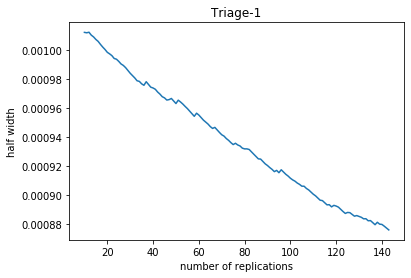

In [41]:
plt.plot(index,hw_t1exc[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("Triage-1")

Text(0.5, 1.0, 'Triage-2')

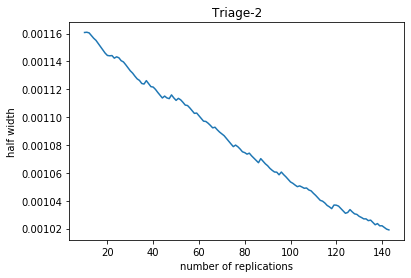

In [42]:
plt.plot(index,hw_t2exc[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("Triage-2")

Text(0.5, 1.0, 'Triage-3')

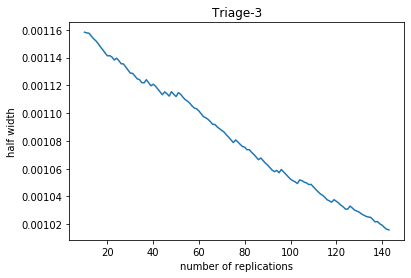

In [43]:
plt.plot(index,hw_t3exc[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("Triage-3")

Text(0.5, 1.0, 'IP-1')

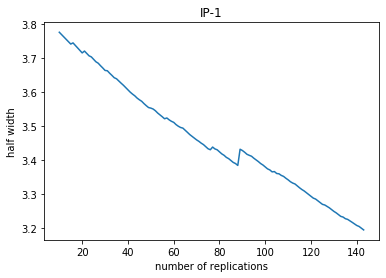

In [44]:
plt.plot(index,hw_ip1cost[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("IP-1")

Text(0.5, 1.0, 'IP-2')

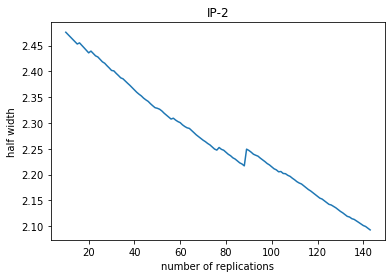

In [45]:
plt.plot(index,hw_ip2cost[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("IP-2")

Text(0.5, 1.0, 'IP-3')

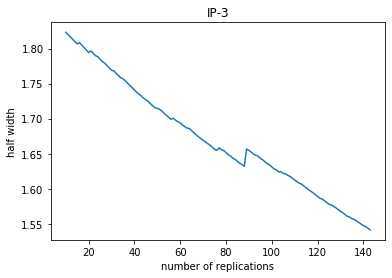

In [46]:
plt.plot(index,hw_ip3cost[10:])
plt.xlabel("number of replications")
plt.ylabel("half width")
plt.title("IP-3")

## Plots for result analysis, threshold policy 

Text(0.5, 1.0, 'Triage-1 Patient Waiting Times Under Threshold Policy')

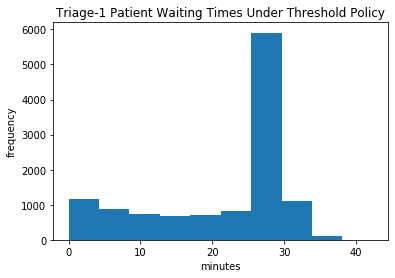

In [80]:
plt.hist(T1WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-1 Patient Waiting Times Under Threshold Policy")

Text(0.5, 1.0, 'Triage-2 Patient Waiting Times Under Threshold Policy')

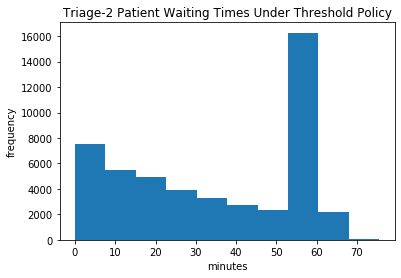

In [81]:
plt.hist(T2WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-2 Patient Waiting Times Under Threshold Policy")

Text(0.5, 1.0, 'Triage-3 Patient Waiting Times Under Threshold Policy')

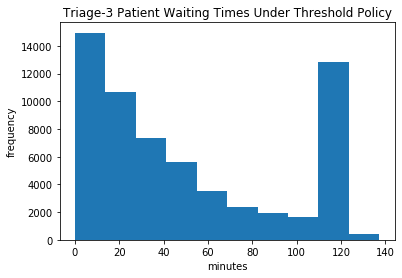

In [82]:
plt.hist(T3WaitingTimes)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Triage-3 Patient Waiting Times Under Threshold Policy")

Text(0.5, 1.0, 'IP-1 Queue Length Under Threshold Policy')

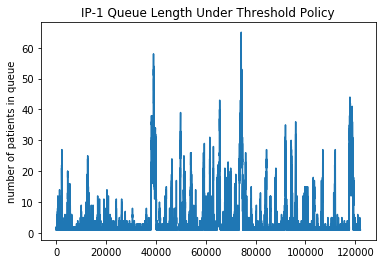

In [83]:
plt.plot(IP1QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-1 Queue Length Under Threshold Policy")

Text(0.5, 1.0, 'IP-2 Queue Length Under Threshold Policy')

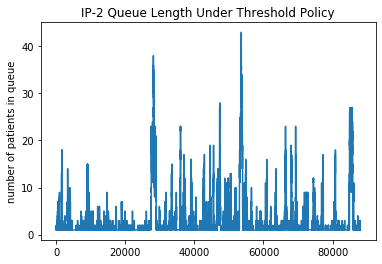

In [84]:
plt.plot(IP2QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-2 Queue Length Under Threshold Policy")

Text(0.5, 1.0, 'IP-3 Queue Length Under Threshold Policy')

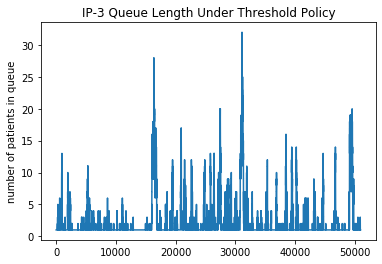

In [85]:
plt.plot(IP3QueueLength)
#plt.xlabel("minutes")
plt.ylabel("number of patients in queue")
plt.title("IP-3 Queue Length Under Threshold Policy")